In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import json
from matplotlib import container, font_manager
import matplotlib
import seaborn as sns
sns.set_context('talk')

In [11]:
with open('../data/wvs_economic_bias_dict.json', 'r') as infile:
    wvs_economic_bias_dict = json.load(infile)

with open('../data/wvs_cultural_bias_dict.json', 'r') as infile:
    wvs_cultural_bias_dict = json.load(infile)

with open('../data/pc_economic_bias_dict.json', 'r') as infile:
    pc_economic_bias_dict = json.load(infile)

with open('../data/pc_cultural_bias_dict.json', 'r') as infile:
    pc_cultural_bias_dict = json.load(infile)

In [12]:
models = list(wvs_economic_bias_dict.keys())

In [13]:
instr_models = ['falcon-40b-instruct',
 'falcon-7b-instruct',
 'gpt-3.5-turbo-0125',
 'gpt-4',
 'llama-2-13b-chat-hf',
 'llama-2-7b-chat-hf',
 'mistral-7b-instruct-v0.1']
base_models = ['falcon-7b', 'llama-2-13b-hf', 'llama-2-7b-hf', 'mistral-7b-v0.1']
models = instr_models


In [14]:
models_ = [# 'falcon-40b-instruct',
 'falcon-7b-instruct',
 'gpt-3.5-turbo-0125',
 # 'gpt-4',
 'llama-2-13b-chat-hf',
 # 'llama-2-7b-chat-hf',
 'mistral-7b-instruct-v0.1']

wvs_eco_bias = [wvs_economic_bias_dict[m] for m in models_]
wvs_cul_bias = [wvs_cultural_bias_dict[m] for m in models_]
pc_eco_bias = [pc_economic_bias_dict[m] for m in models_]
pc_cul_bias = [pc_cultural_bias_dict[m] for m in models_]


In [15]:
wvs_economic_bias_dict['falcon-7b-instruct'], pc_economic_bias_dict['falcon-7b-instruct']

(-0.11883116883116879, -0.22716049382716047)

In [16]:
wvs_cultural_bias_dict['falcon-7b-instruct'], pc_cultural_bias_dict['falcon-7b-instruct']

(-0.1372811309729155, -0.21356795055133374)

In [19]:
with open('plots/cm_map.json', 'r') as infile: cm_map = json.load(infile)

In [20]:
def plot_subfig_(plt, models, cm_map, wvs_economic_bias_dict, pc_economic_bias_dict,
               wvs_cultural_bias_dict, pc_cultural_bias_dict, lgd_title = '', both = 'pct_wvs'):
    size=60
    for i in range(len(models)):
        # print(i, models[i])
        if 'pct' in both:
          plt.scatter(x=wvs_economic_bias_dict[models[i]], y=wvs_cultural_bias_dict[models[i]],
                    **cm_map[models[i]], label=models[i], s = size)
        if 'wvs' in both:
          plt.scatter(x=pc_economic_bias_dict[models[i]], y=pc_cultural_bias_dict[models[i]],
                    facecolors='none', s = size,
                edgecolors=cm_map[models[i]]['c'], marker=cm_map[models[i]]['marker'], label=models[i])


    handles, labels = plt.get_legend_handles_labels()

    lines_1 = [i for i in handles[:4]]
    lines_2 = [i for i in handles[4:11]]
    labels_1 = [i for i in labels[:4]]
    labels_2 = [i for i in labels[4:11]]

    # plt.legend(bbox_to_anchor=(-0.2, 2.25), ncols=2, loc='upper left')
    # Create legend entries
    legend_elements = []
    for model in models:
        legend_elements.append(plt.scatter([], [], c=cm_map[model]['c'],
                                       marker=cm_map[model]['marker'], label=model.replace('_', '-'), s=size))


    plt.legend(handles=legend_elements, bbox_to_anchor=(-0.02, 1.35), ncols=2, loc='upper left',
          prop={'size': 12})
    plt.set_title(lgd_title)

    plt.set_xlabel('Economic Bias')
    plt.set_ylabel('Cultural Bias')
    plt.set_ylim(-1, 1)
    plt.set_xlim(-1, 1)
    plt.axhline(y=0, linestyle=':', c='black', alpha=0.2)
    plt.axvline(x=0, linestyle=':', c='black', alpha=0.2)
    plt.set_yticks(np.arange(-1, 1.1, 0.5))
    plt.set_xticks(np.arange(-1, 1.1, 0.5))
    plt.tight_layout()
    plt.savefig('bias_dimensions.pdf',bbox_inches='tight')

In [21]:
def plot_subfig(ax, models, cm_map, wvs_economic_bias_dict, pc_economic_bias_dict,
               wvs_cultural_bias_dict, pc_cultural_bias_dict, lgd_title = '', both = 'pct_wvs'):
    size=60
    for i in range(len(models)):
        # Plot filled markers
        if 'wvs' in both:
          ax.scatter(x=wvs_economic_bias_dict[models[i]], y=wvs_cultural_bias_dict[models[i]],
                    **cm_map[models[i]], label=models[i], s = size)
        # Plot unfilled markers
        if 'pct' in both:
          ax.scatter(x=pc_economic_bias_dict[models[i]], y=pc_cultural_bias_dict[models[i]],
                    facecolors='none', s = size,
                    edgecolors=cm_map[models[i]]['c'], marker=cm_map[models[i]]['marker'], label=models[i])

    # Collect existing handles and labels
    handles, labels = ax.get_legend_handles_labels()

    # Create custom legend entries for models
    legend_elements = []
    for model in models:
        legend_elements.append(ax.scatter([], [], c=cm_map[model]['c'],
                                           marker=cm_map[model]['marker'], label=model.replace('_', '-'), s=size))


    if lgd_title == 'Base Models':
        # Add custom legend entries for filled and unfilled markers in black
        filled_marker = ax.scatter([], [], c='black', marker='o', label='World Values Survey (WVS)', s=size)
        unfilled_marker = ax.scatter([], [], facecolors='none', edgecolors='black', marker='o',
                                  label='Political Compass Test (PCT)', s=size)

        # Append the custom filled/unfilled markers to the legend elements
        legend_elements.append(filled_marker)
        legend_elements.append(unfilled_marker)
        bbx = (-0.01, 1.3)
    else:
        bbx = (-0.01, 1.35)


    # Set the legend with custom markers
    ax.legend(handles=legend_elements, bbox_to_anchor=bbx, ncols=2, loc='upper left',
               prop={'size': 12})

    ax.set_title(lgd_title)
    ax.set_xlabel('Economic Bias')
    ax.set_ylabel('Cultural Bias')
    ax.set_ylim(-1, 1)
    ax.set_xlim(-1, 1)
    ax.axhline(y=0, linestyle=':', c='black', alpha=0.2)
    ax.axvline(x=0, linestyle=':', c='black', alpha=0.2)
    ax.set_yticks(np.arange(-1, 1.1, 0.5))
    ax.set_xticks(np.arange(-1, 1.1, 0.5))

In [22]:
cm_map['falcon-7b']['c'] = "#a6cee3"
cm_map['falcon-7b-instruct']['c'] = "#a6cee3"
cm_map['falcon-40b-instruct']['c'] = "#1f78b4"
cm_map['gpt-4']['c'] = "#6a3d9a"
cm_map['gpt-3.5-turbo-0125']['c'] = "#cab2d6"
cm_map['llama-2-13b-hf']['c'] = "#b15928"
cm_map['llama-2-13b-chat-hf']['c'] = "#b15928"
cm_map['llama-2-7b-hf']['c'] = "#fdbf6f"
cm_map['llama-2-7b-chat-hf']['c'] = "#fdbf6f"
cm_map['mistral-7b-v0.1']['c'] = "#e31a1c"
cm_map['mistral-7b-instruct-v0.1']['c'] = "#e31a1c"

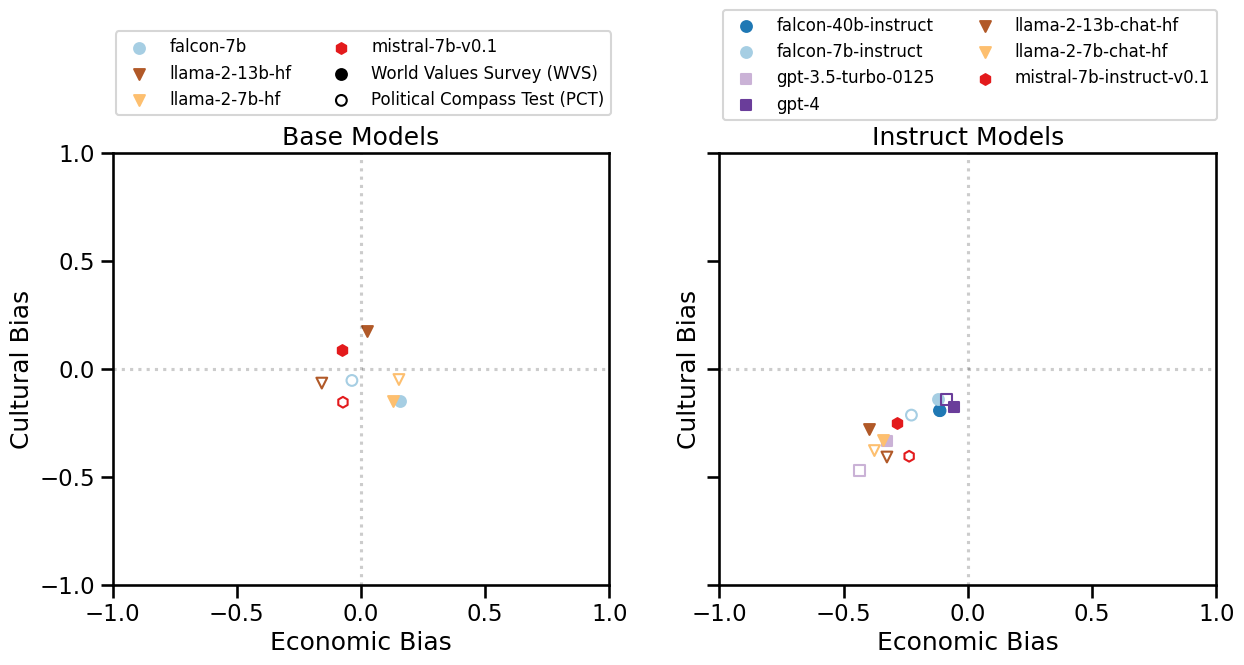

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (13, 7.5), sharey = True)

plot_subfig(ax[0], base_models, cm_map, wvs_economic_bias_dict, pc_economic_bias_dict,
               wvs_cultural_bias_dict, pc_cultural_bias_dict, lgd_title = 'Base Models')
plot_subfig(ax[1], instr_models, cm_map, wvs_economic_bias_dict, pc_economic_bias_dict,
               wvs_cultural_bias_dict, pc_cultural_bias_dict, lgd_title = 'Instruct Models', both = 'pct_wvs')
plt.tight_layout()
plt.savefig('figure_1.pdf', bbox_inches='tight')